# 数据预处理

In [93]:
import re
import nltk
# nltk.download('punkt')
import paddle
import numpy as np
from sklearn import preprocessing  
from nltk.tokenize import word_tokenize

In [94]:
corpus=open("./data/data101239/corpus.txt").read()

In [95]:
corpus

'Next Word Prediction is also called Language Modeling. It is the task of predicting what word comes next. It is one of the fundamental tasks of NLP and has many applications. You might be using it daily when you write texts or emails without realizing it.'

In [96]:
# 将字母全部转为小写，并按照
def preprocess(corpus):
    corpus = corpus.strip().lower()
    corpus=re.sub('[^a-z0-9]+',' ', corpus)
    corpus = word_tokenize(corpus)
    return corpus

corpus = preprocess(corpus)
corpus

['next',
 'word',
 'prediction',
 'is',
 'also',
 'called',
 'language',
 'modeling',
 'it',
 'is',
 'the',
 'task',
 'of',
 'predicting',
 'what',
 'word',
 'comes',
 'next',
 'it',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'tasks',
 'of',
 'nlp',
 'and',
 'has',
 'many',
 'applications',
 'you',
 'might',
 'be',
 'using',
 'it',
 'daily',
 'when',
 'you',
 'write',
 'texts',
 'or',
 'emails',
 'without',
 'realizing',
 'it']

In [97]:
def build_dict(corpus):
    word_freq = dict()
    for word in corpus:
        if word not in word_freq:
            word_freq[word] = 0
        word_freq[word] += 1

    word_freq = sorted(word_freq.items(), key = lambda x:x[1], reverse = True)

    #构造3个不同的词典，分别存储，
    #每个词到id的映射关系：word2id_dict
    #每个id出现的频率：word2id_freq
    #每个id到词典映射关系：id2word_dict
    word2id_dict = dict()
    word2id_freq = dict()
    id2word_dict = dict()

    #按照频率，从高到低，开始遍历每个单词，并为这个单词构造id
    for word, freq in word_freq:
        curr_id = len(word2id_dict)
        word2id_dict[word] = curr_id
        word2id_freq[word2id_dict[word]] = freq
        id2word_dict[curr_id] = word

    return word2id_freq, word2id_dict, id2word_dict

word2id_freq, word2id_dict, id2word_dict = build_dict(corpus)

In [98]:
word2id_freq

{0: 4,
 1: 3,
 2: 3,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1}

In [99]:
#将语料库中的单词装换为对应的id
def convert_corpus_to_id(corpus, word2id_dict):
    corpus = [word2id_dict[word] for word in corpus]
    return corpus

corpus = convert_corpus_to_id(corpus, word2id_dict)
corpus

[3,
 4,
 7,
 1,
 8,
 9,
 10,
 11,
 0,
 1,
 5,
 12,
 2,
 13,
 14,
 4,
 15,
 3,
 0,
 1,
 16,
 2,
 5,
 17,
 18,
 2,
 19,
 20,
 21,
 22,
 23,
 6,
 24,
 25,
 26,
 0,
 27,
 28,
 6,
 29,
 30,
 31,
 32,
 33,
 34,
 0]

In [100]:
#length of the sequence to train
train_len = 3

In [101]:
text_sequences = []
for i in range(train_len,len(corpus)+1):
  seq = corpus[i-train_len:i]
  text_sequences.append(seq)

text_sequences

[[3, 4, 7],
 [4, 7, 1],
 [7, 1, 8],
 [1, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 0],
 [11, 0, 1],
 [0, 1, 5],
 [1, 5, 12],
 [5, 12, 2],
 [12, 2, 13],
 [2, 13, 14],
 [13, 14, 4],
 [14, 4, 15],
 [4, 15, 3],
 [15, 3, 0],
 [3, 0, 1],
 [0, 1, 16],
 [1, 16, 2],
 [16, 2, 5],
 [2, 5, 17],
 [5, 17, 18],
 [17, 18, 2],
 [18, 2, 19],
 [2, 19, 20],
 [19, 20, 21],
 [20, 21, 22],
 [21, 22, 23],
 [22, 23, 6],
 [23, 6, 24],
 [6, 24, 25],
 [24, 25, 26],
 [25, 26, 0],
 [26, 0, 27],
 [0, 27, 28],
 [27, 28, 6],
 [28, 6, 29],
 [6, 29, 30],
 [29, 30, 31],
 [30, 31, 32],
 [31, 32, 33],
 [32, 33, 34],
 [33, 34, 0]]

In [102]:
sequences=np.asarray(text_sequences)

In [103]:
#vocabulary size
vocabulary_size = len(word2id_dict)+1
vocabulary_size

36

In [104]:
#trainX
train_inputs=sequences[:,:-1]
train_inputs

array([[ 3,  4],
       [ 4,  7],
       [ 7,  1],
       [ 1,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11,  0],
       [ 0,  1],
       [ 1,  5],
       [ 5, 12],
       [12,  2],
       [ 2, 13],
       [13, 14],
       [14,  4],
       [ 4, 15],
       [15,  3],
       [ 3,  0],
       [ 0,  1],
       [ 1, 16],
       [16,  2],
       [ 2,  5],
       [ 5, 17],
       [17, 18],
       [18,  2],
       [ 2, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23,  6],
       [ 6, 24],
       [24, 25],
       [25, 26],
       [26,  0],
       [ 0, 27],
       [27, 28],
       [28,  6],
       [ 6, 29],
       [29, 30],
       [30, 31],
       [31, 32],
       [32, 33],
       [33, 34]])

In [105]:
#input sequence length 
seq_length=train_inputs.shape[1]
seq_length

2

In [106]:
#trainY
train_targets=sequences[:,-1]
train_targets

array([ 7,  1,  8,  9, 10, 11,  0,  1,  5, 12,  2, 13, 14,  4, 15,  3,  0,
        1, 16,  2,  5, 17, 18,  2, 19, 20, 21, 22, 23,  6, 24, 25, 26,  0,
       27, 28,  6, 29, 30, 31, 32, 33, 34,  0])

In [107]:
one_hot_label = np.zeros(shape=(train_targets.shape[0],vocabulary_size)) #生成全0矩阵
one_hot_label[np.arange(0,train_targets.shape[0]),train_targets] = 1 #相应标签位置置1
one_hot_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# 构建模型

In [108]:
import paddle.nn as nn
import paddle.fluid as fluid

In [109]:
class myLSTM(nn.Layer):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(myLSTM, self).__init__()

        # num_embeddings (int) - 嵌入字典的大小， input中的id必须满足 0 =< id < num_embeddings 。 。
        # embedding_dim (int) - 每个嵌入向量的维度。
        # padding_idx (int|long|None) - padding_idx的配置区间为 [-weight.shape[0], weight.shape[0]，如果配置了padding_idx，那么在训练过程中遇到此id时会被用
        # sparse (bool) - 是否使用稀疏更新，在词嵌入权重较大的情况下，使用稀疏更新能够获得更快的训练速度及更小的内存/显存占用。
        # weight_attr (ParamAttr|None) - 指定嵌入向量的配置，包括初始化方法，具体用法请参见 ParamAttr ，一般无需设置，默认值为None。
        self.embedding = nn.Embedding(vocab_size, embed_size)

        # input_size (int) - 输入的大小。
        # hidden_size (int) - 隐藏状态大小。
        # num_layers (int，可选) - 网络层数。默认为1。
        # direction (str，可选) - 网络迭代方向，可设置为forward或bidirect（或bidirectional）。默认为forward。
        # time_major (bool，可选) - 指定input的第一个维度是否是time steps。默认为False。
        # dropout (float，可选) - dropout概率，指的是出第一层外每层输入时的dropout概率。默认为0。
        # weight_ih_attr (ParamAttr，可选) - weight_ih的参数。默认为None。
        # weight_hh_attr (ParamAttr，可选) - weight_hh的参数。默认为None。
        # bias_ih_attr (ParamAttr，可选) - bias_ih的参数。默认为None。
        # bias_hh_attr (ParamAttr，可选) - bias_hh的参数。默认为None。
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2)

        # in_features (int) – 线性变换层输入单元的数目。
        # out_features (int) – 线性变换层输出单元的数目。
        # weight_attr (ParamAttr, 可选) – 指定权重参数的属性。默认值为None，表示使用默认的权重参数属性，将权重参数初始化为0。具体用法请参见 ParamAttr 。
        # bias_attr (ParamAttr|bool, 可选) – 指定偏置参数的属性。 bias_attr 为bool类型且设置为False时，表示不会为该层添加偏置。 bias_attr 如果设置为True或者None，则表示使用默认的偏置参数属性，将偏置参数初始化为0。具体用法请参见 ParamAttr 。默认值为None。
        # name (str，可选) – 具体用法请参见 Name ，一般无需设置，默认值为None。
        self.linear = nn.Linear(hidden_size*seq_length, out_features=vocab_size,bias_attr=True)

    

    def forward(self, input_word):
        
        emb = self.embedding(input_word)
        
        output, hidden = self.lstm(emb)

        # output = output.view(output.size(0), -1)
        output =paddle.reshape(output,(output.shape[0], -1))

        
        output = self.linear(output)

        return output, hidden

In [110]:
model=myLSTM(vocab_size=vocabulary_size,embed_size=128, hidden_size=256)

In [111]:
model

myLSTM(
  (embedding): Embedding(36, 128, sparse=False)
  (lstm): LSTM(128, 256, num_layers=2
    (0): RNN(
      (cell): LSTMCell(128, 256)
    )
    (1): RNN(
      (cell): LSTMCell(256, 256)
    )
  )
  (linear): Linear(in_features=512, out_features=36, dtype=float32)
)

In [112]:
#Adam optimizer
optimizer= paddle.optimizer.Adam(parameters=model.parameters(), learning_rate=0.07)

#loss
criterion = nn.BCEWithLogitsLoss()

In [113]:
#number of epoch
no_epoch=50
losses=[]
accuracy = []

with fluid.dygraph.guard(paddle.CUDAPlace(0)):
    
    for epoch in range(1,no_epoch+1):
        model.train()
        tr_loss = 0

        y_pred, (state_h, state_c) = model(paddle.to_tensor(train_inputs))

        loss = criterion(y_pred, paddle.to_tensor(one_hot_label.astype('float32')))
        losses.append(loss.numpy().item())

        loss.backward()
        optimizer.minimize(loss)
        model.clear_gradients()

        model.eval()

        y_pred, (state_h, state_c) = model(paddle.to_tensor(train_inputs))

        acc = (np.argmax(y_pred.numpy(),axis=1) == train_targets).sum() / len(train_targets) 
        accuracy.append(acc)

        print("Epoch : ",epoch,"loss : ",loss.numpy().item(), 'accuracy : ',acc)


Epoch :  1 loss :  0.692509114742279 accuracy :  0.06818181818181818
Epoch :  2 loss :  0.17023588716983795 accuracy :  0.06818181818181818
Epoch :  3 loss :  0.3819776177406311 accuracy :  0.045454545454545456
Epoch :  4 loss :  0.4142425060272217 accuracy :  0.045454545454545456
Epoch :  5 loss :  0.1554083228111267 accuracy :  0.09090909090909091
Epoch :  6 loss :  0.18031537532806396 accuracy :  0.11363636363636363
Epoch :  7 loss :  0.16328178346157074 accuracy :  0.11363636363636363
Epoch :  8 loss :  0.18777692317962646 accuracy :  0.06818181818181818
Epoch :  9 loss :  0.15260837972164154 accuracy :  0.045454545454545456
Epoch :  10 loss :  0.17988544702529907 accuracy :  0.06818181818181818
Epoch :  11 loss :  0.15880520641803741 accuracy :  0.06818181818181818
Epoch :  12 loss :  0.14847642183303833 accuracy :  0.20454545454545456
Epoch :  13 loss :  0.13363617658615112 accuracy :  0.18181818181818182
Epoch :  14 loss :  0.11957237869501114 accuracy :  0.25
Epoch :  15 loss :

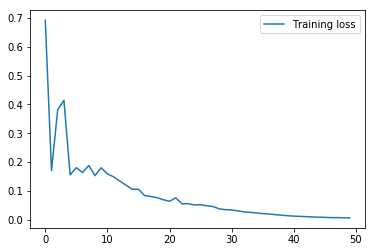

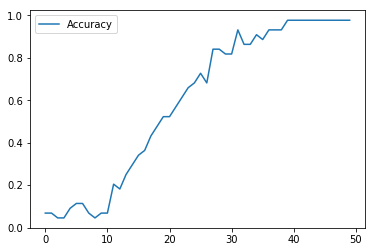

In [115]:
#plotting the loss, loss is decreasing for each epoch
import matplotlib.pyplot as plt
plt.plot(losses, label='Training loss')
plt.legend(loc="upper right")   #显示图中的标签
plt.show()

plt.plot(accuracy, label='Accuracy')
plt.legend(loc="upper left")   #显示图中的标签
plt.show()